In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader

In [6]:
states = pd.read_csv("states.csv",
                     header=None,
                     names=["x_p", "y_p", "t_p", "x", "y", "t"])
states.tail()

,x_p,y_p,t_p,x,y,t
995,8.964350,5.976233,1.572250e-08,9.042452,1.493250,7.0
996,9.142417,6.094944,1.540991e-08,9.225211,1.615089,7.0
997,9.284330,6.189554,1.510353e-08,9.411034,1.738971,7.0
998,9.389530,6.259687,1.480325e-08,9.599186,1.864406,7.0
999,9.457599,6.305066,1.450894e-08,9.788924,1.990897,7.0


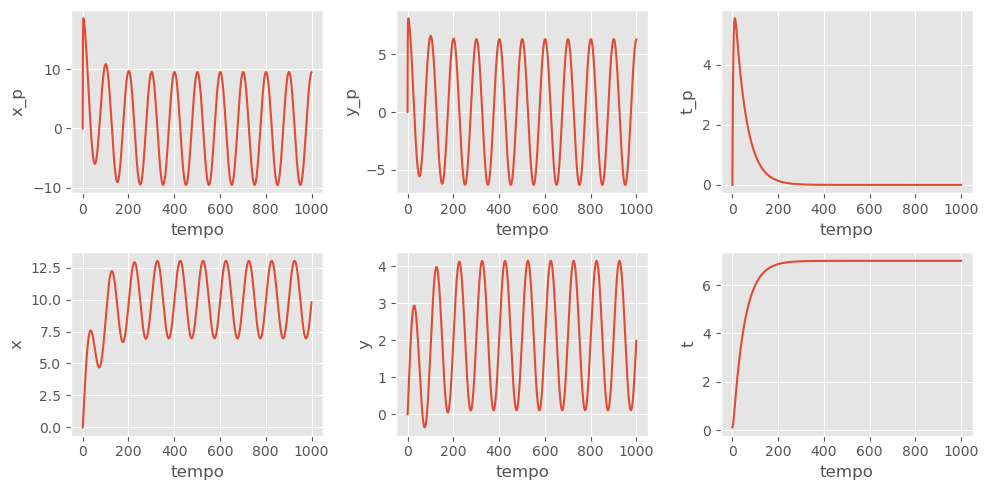

In [7]:
t = np.linspace(0,len(states),len(states))

plt.style.use("ggplot")
fig, axs = plt.subplots(2,3, figsize=(10,5))

for i, (ax, state) in enumerate(zip(axs.flatten(), states)):
    ax.plot(t, states[state])
    ax.set_ylabel(state)
    ax.set_xlabel("tempo")

fig.tight_layout()

In [8]:
def noise(states, p=0.05):
    noised_states = pd.DataFrame()
    for state in states:
        s = np.random.normal(0,max(states[state]),len(states))
        noised_states[state] = p*s +states[state]
    return noised_states

def traj_gen(n, states):
    traj = []
    for i in range(n):
        noised_states = noise(states)
        traj.append(noised_states)
    return traj

In [9]:
class MyDataset(Dataset):
    def __init__(self, states, forces, normalize=False):
        super().__init__()
        self.states = states
        self.forces = forces
        self.normalize = normalize

    def __len__(self):
        if len(self.states) == len(self.forces):
            return len(self.states)
        else:
            raise ValueError("States and forces must have the same length")
    
    def __getitem__(self, index):
        state = self.states[index]
        force = self.forces[index]
        if self.normalize:
            pass
        state = torch.tensor(state, dtype=torch.float32)
        force = torch.tensor(force, dtype=torch.float32)
        return state, force

In [11]:
erro(2)

-1